In [17]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
import numpy as np 
from sklearn.datasets import *
from sklearn.cluster import KMeans
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
import os 

In [18]:
os.environ["LOKY_MAX_CPU_COUNT"] = "4"

In [50]:
data = load_digits()

In [51]:
data

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [53]:
df = pd.DataFrame(data=data['data'],columns=data['feature_names'])
target = pd.DataFrame(data=data['target'])

In [56]:
df_digit = pd.concat([df,target],axis=1)

In [57]:
df_digit

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,0
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [59]:
x = df.copy().values
y = data['target']


In [66]:
kmeans = KMeans()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=15)
kmeans.fit(x_train,y_train)

KMeans()

In [67]:
y_pred = kmeans.predict(x_test)

In [68]:
x = np.array([i + 1 for i in range(len(y_pred))])

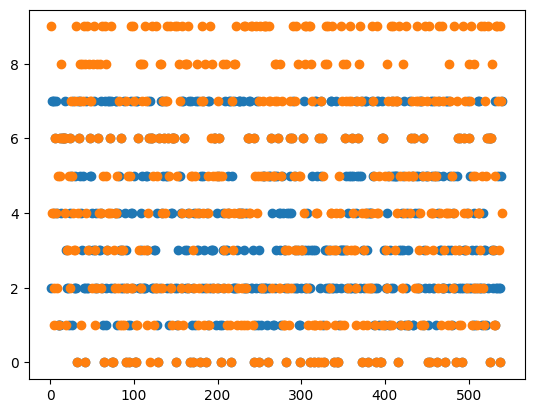

In [71]:
plt.scatter(x,y_pred)
plt.scatter(x,y_test)
plt.show()

In [74]:
data_Tinggi = np.array([np.random.randint(175,180) for i in range(50)])
data_berat = np.array([np.random.randint(65,70) for i in range(50)])
data_pendek = np.array([np.random.randint(165,170) for i in range(50)])
data_ringan = np.array([np.random.randint(45,50) for i in range(50)])
df1 = pd.DataFrame(data={'Tinggi badan' : data_Tinggi,'Berat badan' : data_berat})
df2 = pd.DataFrame(data={'Tinggi badan' : data_pendek,'Berat badan' : data_ringan})

In [104]:
from sklearn.utils import shuffle
df_true = pd.concat([df1,df2])
df_true = shuffle(df_true)

In [106]:
df_true.reset_index(inplace=True)

In [110]:
True_False = []
for i in range(len(df_true['Tinggi badan'])) :
    if df_true['Tinggi badan'][i] < 175 :
        True_False.append(5)
    else :
        True_False.append(10)

kelompok = pd.DataFrame(data={'Keterangan' : True_False})

In [111]:
df_t = pd.concat([df_true,kelompok],axis=1)

In [122]:
df_t.drop(['index'],axis=1,inplace=True)
x = df_t.drop(['Keterangan'],axis=1).values
y = df_t['Keterangan'].values

In [134]:
kmeans.fit(x,y)

KMeans()

In [145]:
x_target = np.array([np.random.randint(160,180) for i in range(50)])
y_target = np.array([np.random.randint(45,75) for i in range(50)])
b_target = pd.DataFrame(data={'Tinggi Badan ' : x_target,'Berat badan' : y_target})

In [146]:
target = b_target.values

In [147]:
predicted = kmeans.predict(target)

In [148]:
predicted

array([2, 0, 2, 0, 1, 7, 2, 1, 7, 1, 6, 3, 7, 2, 7, 1, 3, 7, 2, 3, 4, 2,
       3, 1, 7, 1, 1, 2, 3, 1, 2, 2, 7, 0, 7, 2, 2, 0, 7, 0, 7, 7, 3, 1,
       6, 2, 2, 3, 1, 1])

In [2]:
data =pd.read_csv('C://Users/ASUS/Documents/force2020_data_unsupervised_learning.csv',index_col='DEPTH_MD')

In [3]:
data

,RHOB,GR,NPHI,PEF,DTC
DEPTH_MD,,,,,
494.528,1.884186,80.200851,NaN,20.915468,161.131180
494.680,1.889794,79.262886,NaN,19.383013,160.603470
494.832,1.896523,74.821999,NaN,22.591518,160.173615
494.984,1.891913,72.878922,NaN,32.191910,160.149429
495.136,1.880034,71.729141,NaN,38.495632,160.128342
...,...,...,...,...,...
3271.416,2.630211,19.418915,0.187811,NaN,NaN
3271.568,2.643114,21.444370,0.185574,NaN,NaN
3271.720,2.681300,22.646879,0.176074,NaN,NaN


In [6]:
scaler = StandardScaler()

In [7]:
data.dropna(inplace=True)

In [8]:
data

,RHOB,GR,NPHI,PEF,DTC
DEPTH_MD,,,,,
1138.704,1.774626,55.892757,0.765867,1.631495,147.837677
1138.856,1.800986,60.929138,0.800262,1.645080,142.382431
1139.008,1.817696,62.117264,0.765957,1.645873,138.258331
1139.160,1.829333,61.010860,0.702521,1.620216,139.198914
1139.312,1.813854,58.501236,0.639708,1.504854,144.290085
...,...,...,...,...,...
2993.256,2.468236,90.537521,0.341534,4.699200,86.474564
2993.408,2.457519,88.819122,0.351085,4.699200,86.187599
2993.560,2.429228,92.128922,0.364982,4.699200,87.797836


In [9]:
data.describe()

,RHOB,GR,NPHI,PEF,DTC
count,12202.000000,12202.000000,12202.000000,12202.000000,12202.000000
mean,2.149947,61.253852,0.414572,3.912313,121.409905
std,0.251592,29.902708,0.139207,1.816933,30.394369
min,1.493417,6.191506,0.037976,1.126667,55.726753
25%,1.983767,42.792794,0.313797,2.629141,89.977041
50%,2.059335,62.886322,0.466891,3.365132,138.477173
75%,2.389839,77.726776,0.513840,4.686422,146.242302
max,2.889454,499.022583,0.800262,17.026619,163.910797


In [11]:
data[['RHOB_T','GR_T','NPHI_T','PEF_T','DTC_T']] = scaler.fit_transform(data[['RHOB','GR','NPHI','PEF','DTC']])

In [14]:
data

,RHOB,GR,NPHI,PEF,DTC,RHOB_T,GR_T,NPHI_T,PEF_T,DTC_T
DEPTH_MD,,,,,,,,,,
1138.704,1.774626,55.892757,0.765867,1.631495,147.837677,-1.491843,-0.179292,2.523654,-1.255364,0.869531
1138.856,1.800986,60.929138,0.800262,1.645080,142.382431,-1.387067,-0.010859,2.770744,-1.247886,0.690042
1139.008,1.817696,62.117264,0.765957,1.645873,138.258331,-1.320646,0.028875,2.524300,-1.247450,0.554350
1139.160,1.829333,61.010860,0.702521,1.620216,139.198914,-1.274390,-0.008126,2.068584,-1.261572,0.585297
1139.312,1.813854,58.501236,0.639708,1.504854,144.290085,-1.335919,-0.092056,1.617342,-1.325067,0.752808
...,...,...,...,...,...,...,...,...,...,...
2993.256,2.468236,90.537521,0.341534,4.699200,86.474564,1.265151,0.979338,-0.524699,0.433103,-1.149449
2993.408,2.457519,88.819122,0.351085,4.699200,86.187599,1.222550,0.921870,-0.456081,0.433103,-1.158891
2993.560,2.429228,92.128922,0.364982,4.699200,87.797836,1.110101,1.032560,-0.356250,0.433103,-1.105910


In [15]:
def optimise_k_means (data,max_k) :
    means = []
    inetias = []

    for k in range(1,max_k) :
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)

        means.append(k)
        inetias.append(kmeans.inertia_)
    
    #Generate the Elbow plot
    fig = plt.subplots(figsize = (10,5))
    plt.plot(means,inetias,'o-')
    plt.xlabel('Number cluster')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

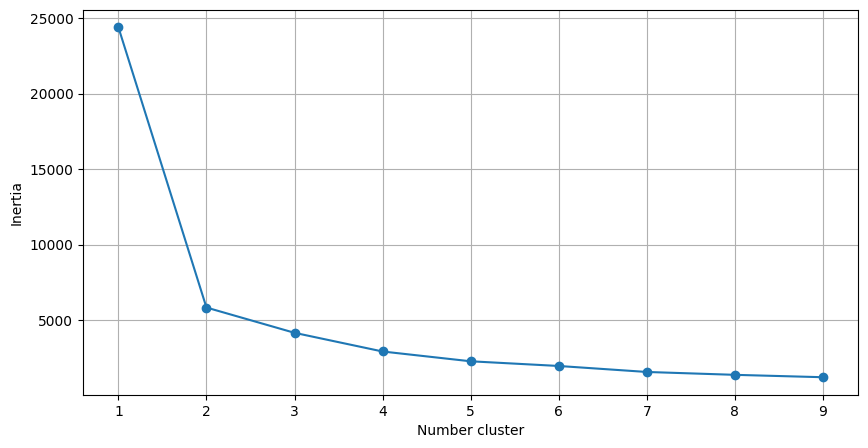

In [19]:
optimise_k_means(data[['RHOB_T','NPHI_T']],10)

In [20]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data[['NPHI_T','RHOB_T']])

KMeans(n_clusters=3)

In [22]:
data['cluter3'] = kmeans.labels_

In [23]:
data

,RHOB,GR,NPHI,PEF,DTC,RHOB_T,GR_T,NPHI_T,PEF_T,DTC_T,cluter3
DEPTH_MD,,,,,,,,,,,
1138.704,1.774626,55.892757,0.765867,1.631495,147.837677,-1.491843,-0.179292,2.523654,-1.255364,0.869531,2
1138.856,1.800986,60.929138,0.800262,1.645080,142.382431,-1.387067,-0.010859,2.770744,-1.247886,0.690042,2
1139.008,1.817696,62.117264,0.765957,1.645873,138.258331,-1.320646,0.028875,2.524300,-1.247450,0.554350,2
1139.160,1.829333,61.010860,0.702521,1.620216,139.198914,-1.274390,-0.008126,2.068584,-1.261572,0.585297,2
1139.312,1.813854,58.501236,0.639708,1.504854,144.290085,-1.335919,-0.092056,1.617342,-1.325067,0.752808,2
...,...,...,...,...,...,...,...,...,...,...,...
2993.256,2.468236,90.537521,0.341534,4.699200,86.474564,1.265151,0.979338,-0.524699,0.433103,-1.149449,0
2993.408,2.457519,88.819122,0.351085,4.699200,86.187599,1.222550,0.921870,-0.456081,0.433103,-1.158891,0
2993.560,2.429228,92.128922,0.364982,4.699200,87.797836,1.110101,1.032560,-0.356250,0.433103,-1.105910,0


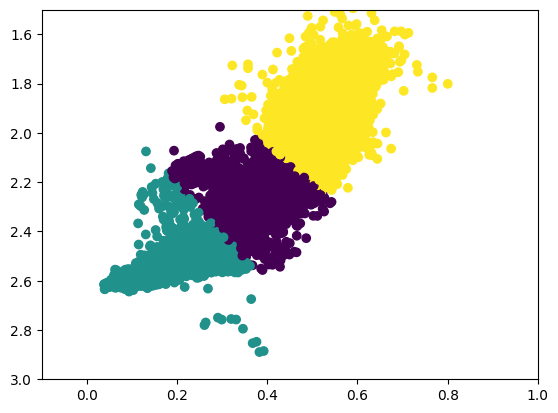

In [25]:
plt.scatter(x=data['NPHI'],y=data['RHOB'],c=data['cluter3'])
plt.xlim(-0.1,1.0)
plt.ylim(3.0,1.5)
plt.show()

In [28]:
for k in range(1,6) :
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data[['RHOB_T','NPHI_T']])

    data[f'K_means{k}'] = kmeans.labels_

In [29]:
data

,RHOB,GR,NPHI,PEF,DTC,RHOB_T,GR_T,NPHI_T,PEF_T,DTC_T,cluter3,K_means1,K_means2,K_means3,K_means4,K_means5
DEPTH_MD,,,,,,,,,,,,,,,,
1138.704,1.774626,55.892757,0.765867,1.631495,147.837677,-1.491843,-0.179292,2.523654,-1.255364,0.869531,2,0,1,0,2,3
1138.856,1.800986,60.929138,0.800262,1.645080,142.382431,-1.387067,-0.010859,2.770744,-1.247886,0.690042,2,0,1,0,2,3
1139.008,1.817696,62.117264,0.765957,1.645873,138.258331,-1.320646,0.028875,2.524300,-1.247450,0.554350,2,0,1,0,2,3
1139.160,1.829333,61.010860,0.702521,1.620216,139.198914,-1.274390,-0.008126,2.068584,-1.261572,0.585297,2,0,1,0,2,3
1139.312,1.813854,58.501236,0.639708,1.504854,144.290085,-1.335919,-0.092056,1.617342,-1.325067,0.752808,2,0,1,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993.256,2.468236,90.537521,0.341534,4.699200,86.474564,1.265151,0.979338,-0.524699,0.433103,-1.149449,0,0,0,1,0,4
2993.408,2.457519,88.819122,0.351085,4.699200,86.187599,1.222550,0.921870,-0.456081,0.433103,-1.158891,0,0,0,1,0,4
2993.560,2.429228,92.128922,0.364982,4.699200,87.797836,1.110101,1.032560,-0.356250,0.433103,-1.105910,0,0,0,1,0,4


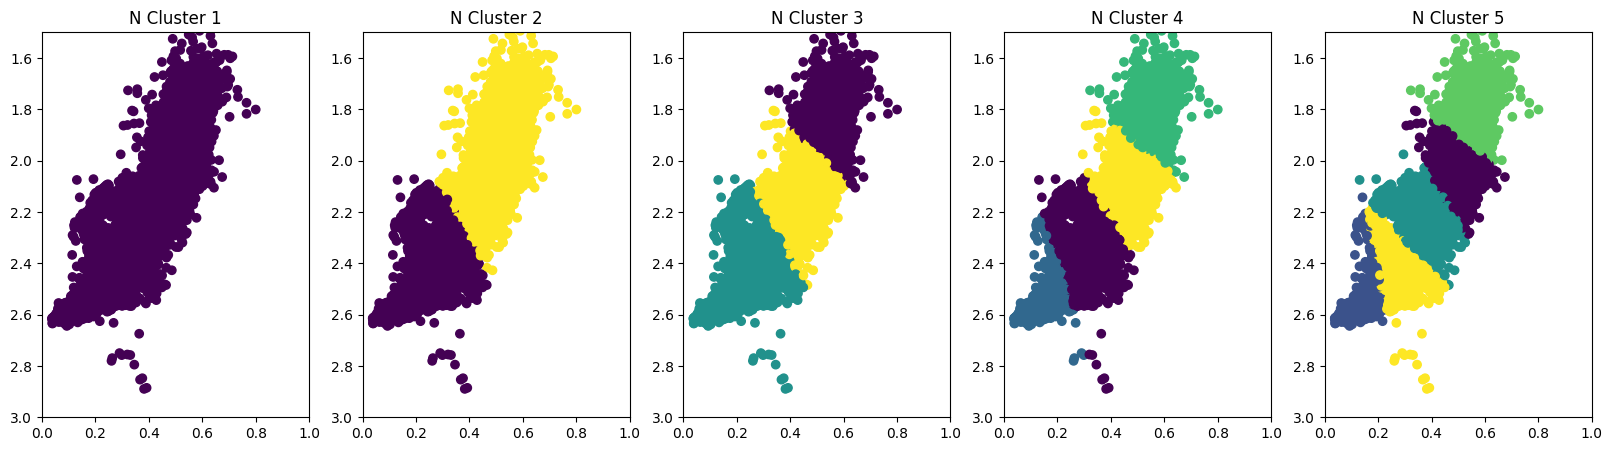

In [31]:
fig,axs=plt.subplots(nrows=1,ncols=5,figsize=(20,5))
for i,ax in enumerate(fig.axes,start=1):
    ax.scatter(x=data['NPHI'],y= data['RHOB'],c = data[f'K_means{i}'])
    ax.set_xlim(0,1)
    ax.set_ylim(3,1.5)
    ax.set_title(f"N Cluster {i}")